In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sber_data = pd.read_csv('../data/sber_data.csv')

fig = sns.boxplot(data=sber_data, 
                  x='price_doc', 
                  y='ecology')



In [ ]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=sber_data['price_doc'],
             y=sber_data['kremlin_km'], 
             s=10);
axes.legend()

In [ ]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols_with_null.plot(kind='bar',
                    figsize=(10,4),
                    title='null`s spread in data')

In [ ]:
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10,4))
cols = cols_with_null.index
ax = sns.heatmap(sber_data[cols].isnull(), 
                 cmap=sns.color_palette(colors))

In [ ]:
drop_data = sber_data.copy()
thresh = drop_data.shape[0]*0.7
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data = drop_data.dropna(how = 'any', axis=0)
drop_data.isnull().mean()
drop_data.shape

In [ ]:
sber_data[cols].hist(figsize=(20,8));

In [ ]:
fill_data = sber_data.copy()
values = {'life_sq': fill_data['full_sq'],
          'metro_min_walk': fill_data['metro_min_walk'].median(), 
          'metro_km_walk': fill_data['metro_km_walk'].median(), 
          'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(), 
          'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(), 
          'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0], 
          'preschool_quota': fill_data['preschool_quota'].mode()[0], 
          'school_quota': fill_data['school_quota'].mode()[0], 
          'floor': fill_data['floor'].mode()[0]}

fill_data = fill_data.fillna(values)
fill_data.isnull().mean()

fill_data[cols].hist(figsize=(20,8));

In [ ]:
indicator_data = sber_data.copy()
for col in cols_with_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
values = {'life_sq': indicator_data['full_sq'],
          'metro_min_walk': indicator_data['metro_min_walk'].median(), 
          'metro_km_walk': indicator_data['metro_km_walk'].median(), 
          'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(), 
          'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(), 
          'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0], 
          'preschool_quota': indicator_data['preschool_quota'].mode()[0], 
          'school_quota': indicator_data['school_quota'].mode()[0], 
          'floor': indicator_data['floor'].mode()[0]}
indicator_data = indicator_data.fillna(values)
indicator_data.isnull().mean()
indicator_data

In [ ]:
outlier = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
cleaned = sber_data.drop(outlier.index, axis=0)
cleaned.shape[0]

In [ ]:
sber_data[sber_data['floor'] > 50]

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Fuul Square Distribution')
boxplot = sns.boxplot(sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [30]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(outliers.shape[0])
print(cleaned.shape[0])

963
29508


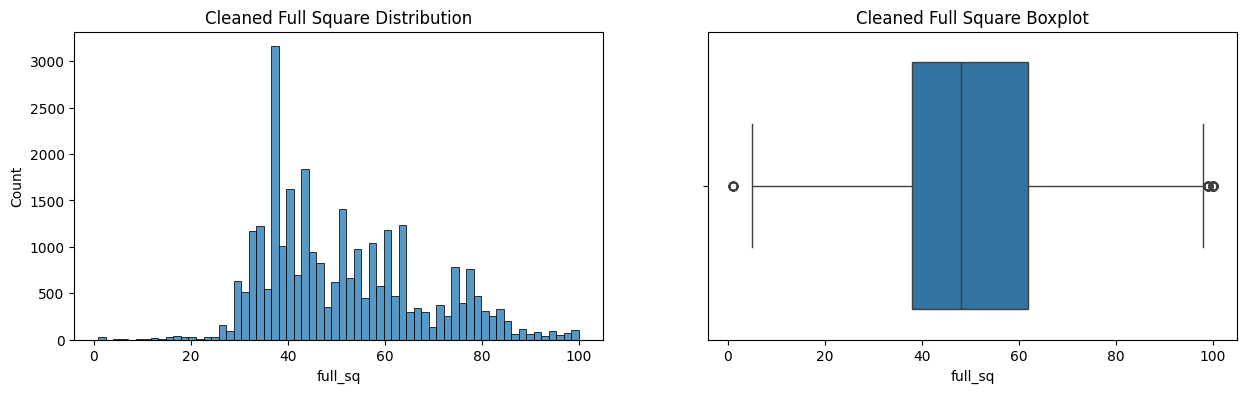

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');